**Problem Formulation**

The problem is supervised text classification problem, and our goal is to investigate which supervised machine learning methods are best suited to solve it.

We have 25 unique resume categories to classify. This is multi-class text classification problem. I can’t wait to see what we can achieve!

**Data Exploration**

Before diving into training machine learning models, we should look into our data to know what exactly is our data:

In [1]:
import pandas as pd
df = pd.read_csv('../input/resume_dataset.csv')
df.head()

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


**Data Cleaning**

We will remove missing values , and add a column encoding the Category as an integer because categorical variables are often better represented by integers than strings.

We also create a couple of dictionaries for future use.

After cleaning up, this is the first five rows of the data we will be working on:

In [2]:
from io import StringIO
col = ['Category', 'Resume']
df = df[col]
df = df[pd.notnull(df['Resume'])]
df.columns = ['Category', 'Resume']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df

,Category,Resume,category_id
0,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",0
1,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,0
2,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,0
3,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,0
4,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",0
5,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",0
6,HR,b'Resume of Satheesh\n\nwww.downlo\nSatheesh\n...,0
7,HR,"b""GM HR & ADMINISTRATION Resume Sample www.tim...",0
8,HR,"b""www.uaehrzone.com\n\nRobert Wales\nDubai\nUn...",0
9,HR,"b""Human Resources Coordinator Resume\nExample\...",0


**Imbalanced Classes**

We see that the number of Categories is imbalanced. Resumes  are more biased towards to few Categories.

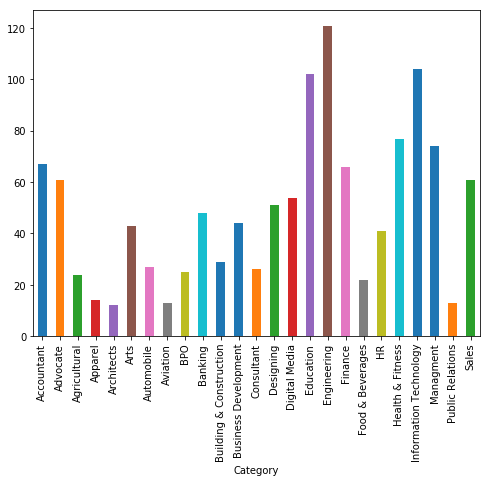

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Category').Resume.count().plot.bar(ylim=0)
plt.show()

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

**Text Representation**

The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of Resume.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Resume).toarray()
labels = df.category_id
features.shape

(1219, 27968)

Now, each of 1219 Resumes is represented by 27968 features, representing the tf-idf score for different unigrams and bigrams.
We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the Category:

In [5]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Accountant':
  . Most correlated unigrams:
. chartered
. accountant
  . Most correlated bigrams:
. x82 xa0
. accountant resume
# 'Advocate':
  . Most correlated unigrams:
. legal
. law
  . Most correlated bigrams:
. law school
. school law
# 'Agricultural':
  . Most correlated unigrams:
. plants
. horticulture
  . Most correlated bigrams:
. npart american
. 5890 nj
# 'Apparel':
  . Most correlated unigrams:
. nfashion
. fashion
  . Most correlated bigrams:
. interior design
. space planning
# 'Architects':
  . Most correlated unigrams:
. tower
. drawings
  . Most correlated bigrams:
. cad xef
. auto cad
# 'Arts':
  . Most correlated unigrams:
. artist
. theatre
  . Most correlated bigrams:
. art institute
. nheight xe2
# 'Automobile':
  . Most correlated unigrams:
. automobile
. automotive
  . Most correlated bigrams:
. nphone 586
. michigan nphone
# 'Aviation':
  . Most correlated unigrams:
. attendant
. flight
  . Most correlated bigrams:
. nflight attendant
. flight attendant
# '

They all make sense, don’t you think so?
Till some extend machine learned to recognize what's more related to a job Category.
Isn't that great?

**Multi-Class Classifier: Features and Design**

To train supervised classifiers, we first transformed the “Resumes” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
After having this vector representations of the text we can train supervised classifiers to train unseen “Resumes” and predict the “Job Category” on which they fall.
After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

After fitting the training set, let’s make some predictions. I'm going to use raw text string resume of a software engineer to predict best class for that resume.

In [7]:
software_engineer = '''﻿Irshad Ali
Email Address: irshadali18@gmail.com,irshadali@outlook.com 
Cell: 0321-7588568

Objective
I am looking forward to join a progressive organization. I am Strong team builder and leader. I have high level of personal morals and integrity. I am Goal oriented, self-motivated and committed to the successful outcome of the project. I am willing to work hard and have a great desire to learn.
Summary
    • Since March 2007, have 6 years plus of extensive hands on experience of website development.
    • An experienced team lead and team player with excellent communication and interpersonal skills who has the ability to work independently under pressure.
    • Currently working as Senior Software Engineer/Team Lead at Hashe Computer Solutions.
    • Masters in 2007 from the University College of Information Technology, Lahore, Pakistan.
Skills
Languages/Web Development
PHP, C# .Net, JavaScript, HTML, CSS, Java, XML, SQL
Frameworks
AJAX, Zend, Symfony2,  CodeIgniter
Open Source
Wordpress, Joomla, XCart, CSCart
Databases
MySQL, Oracle
Tools
Netbeans, Dreamweaver, SqlYog, NavicoSoft, MicroOlap


Experience
Hashe Computer Solution, Lahore, Pakistan 
Senior Software Engineer / Team Lead
(March 2008 – To date)
Responsibilities include team management, direct client communication and software development.
Mechtechnologies, Lahore, Pakistan 
Software Engineer
(March 2007 – February 2008)

Projects
Freight Ordering System – Hashe Computer Solutions
Role:
    • Development Lead
Tools:
    • PHP, MySQL, Ajax, JQuery , Web Services
Details:
    • This is a web based system, which provides an online competitive freight quotes within zip code range from best courier & transport companies of the region with favorable discounts and transit days. Later shipment can be booked out of these quotes and tracked though website. Companies can add / manage their locations, product catalog for swift use of the system.
    • This application works with SMC3 to acquire shipment rates for given locations and then apply different accessorial and fuel charges added by admin to calculate final shipment rates.
    • Using the back office application, admin can set different accessorial, discounts, fuel charges, and FAK classes for each company and carrier. Manage the Sales Representatives & this commission for different companies & Carriers.
    • Comprehensive report system provides reports about the shipment, carrier, customer, sale representative commission and billing reports. 
    • Complete Accounting System.

http://www.freightanywhere.com
http://www.tech-logistics.com

Online Golf Course Booking System – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, Ajax, JQuery, Web Services
Details:
    • This is a web based system, which provides golfers an easy way to use website to search, compare, and book golf tee times for free. With numerous golf courses available for play in most areas.

http://www.back9booking.com

Ecommerce Shopping System – Hashe Computer Solutions
Role:
    • Application Developer/Team Lead
Tools:
    • PHP, MySQL, JQuery, Zend
Details:
Complete ecommerce shopping system with following features
    • Administration system to easily update all product details, prices, pictures, stock details and other information online.
    • Manage Customer Accounts
    • Manage Wish list
    • Customer Reviews & Rating
    • Manage categories and products
    • Manage Product options and related products
    • Advanced pricing algorithms
    • Order and Invoice history
    • Take payments online using PayPal
    • Shopping cart system to allow easy purchase of products
    • Automatic email notification of orders
    • Full checkout procedure
    • Fast and friendly quick search and advanced search features
    • Reports of site visits, pages viewed, most viewed products, most ordered products and most viewed categories
http://www.tcig.co.uk

Free Home Listing – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery, Codeigniter
Details:
This is a property portal with three access level
    • Customer Login
        ◦ Search Properties by State And City, Key words and Zip Code with option in different miles radius i.e. search all properties having zip code 03055 and within 10 miles radius around it.  
        ◦ Register as Customer
        ◦ Manage their Listings
        ◦ Add/Edit property
        ◦ Add/Edit/Delete Properties Images
        ◦ Delete Properties
    • Agent Login
        ◦ Add/Edit property
        ◦ Add/Edit/Delete Properties Images
        ◦ Delete Properties
    • Admin login
        ◦ Manage Customers (Add/Edit/Delete/Active/Inactive)
        ◦ Manage Customer Packages
        ◦ Manage Agents (Add/Edit/Delete/Active/Inactive)
        ◦ Manage Listings (Add/Edit/Delete/Active/Inactive)
http://demo.hashe.com/freehomelistings/

Rockingham Acres – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
This is an Online Flower Store has
    • Online Shopping Cart
    • Word Press Blog
http://www.rockinghamacres.com/


Third Coast Collection – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
This website has
    • Online Shopping Cart
    • Authorized .Net Payment Integration
    • Word Press Blog
http://www.thirdcoastcollection.com/

PPA-Office Management System – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
PPA (Pakistan Progressive Associate) is  licensed  by  Ministry   of  Labor,  Manpower  and  Overseas   Employment ,   Government of  Pakistan for recruitment  of  manpower.  So PPA-Office Management System is developed to manage & integrate all PPA internal processes (i.e. client, contracts, jobs, job seeker registration, resume bank, recruitment process, and visa & departure process). We split this big system into following modules.
    • Office Workflow Management System Administration: This application will allow the administration to
        ◦ Manage Companies, Contracts
        ◦ Application Configurations
        ◦ Manage invoices
        ◦ Manage administrative expenses
            ▪ Advertisement costs
            ▪ Courier charges
            ▪ Misc. charges to be posted
    • Office Workflow Management System: This application will automate the recruitment process of PPA administration and will implement all the business processes hence allowing straight through processing of jobs. This application will have three separate work flows
        ◦ Pre Processing – Jobs management, Resume management and data entry, short listing, interview scheduling and execution, selection of candidates and forwarding for post-processing. 
        ◦ Post Processing
        ◦ Archiving
    • Online Client / Candidate Portal: This portal will allow
        ◦ PPA administration to manage advertisement jobs
        ◦ PPA affiliated companies to:
            ▪ Login into the system
            ▪ Add jobs
            ▪ View list of candidates forwarded by PPA administration, short list them, add notes
            ▪ Browse/Search (if allowed) resume database, create resume lists, add notes on resumes
        ◦ Potential candidates to:
            ▪ Register
            ▪ Add resumes
            ▪ Search for jobs
    • System will allow the printing of all documents required during the execution of a case. System will allow three types of print
        ◦ Printing with PPA logo
        ◦ Printing without PPA logo – to be printed on PPA letter head
        ◦ Custom printing

NetSignNews.com – Hashe Computer Solutions
Role:
    • Development Lead
Tools:
    • PHP, MySQL
Details:
    • Net Sign News is a specialized news channel for with hearing disabilities. NetSignNews.com is an online news portal for NetSignNews. News videos are streamed on demand using FLV format files. This application has a power administration utility using which administrator can manage the contents being published on the website.

VegaPrint.co.uk – VegaSoft Technologies
Role:
    • Development Lead (Freelance)
Tools:
    • PHP, MySQL
Details:
    • This is print media service provider’s website. Here user can order print media products by paying online payment through PayPal, users can also track there orders online. 
    • Using the back office application, admin can add different products, services, special offers, shipment charges, manage users and orders. 

Bug Tracking – Mechtechnologies
Role:
    • Development Team Member
Tools:
    • PHP, MySQL
Details:
This is a web based application which allows software developers to track new bugs, prioritize and assign bugs to team members, generate bug reports, send email messages between users, attach files, customize the account according to their special needs and more.

Academic Projects
Student Information System - MIT Final Project
    • Student Information System superior University Lahore is a web based application developed in PHP and MySQL as database.


Education
Punjab University College of Information Technology, Lahore, Pakistan 
MSC Information Technology 
Year: 2007

Certifications
Microsoft Technologies (Exam: 70-480)
Microsoft Certified Professional 
Year: 2013
Microsoft Technologies (C# .Net)
EVS Lahore 
Year: 2013

Interests
Computer Gaming
References
References can be provided on request.'''
print(clf.predict(count_vect.transform([software_engineer])))

['Information Technology']


Isn't it awesome? 

**Model Selection**

We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.

We will benchmark the following four models:

* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

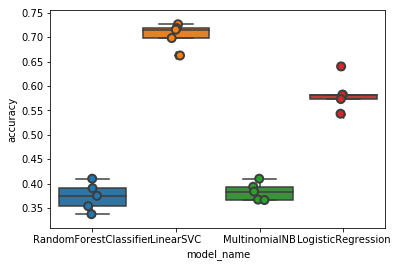

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [10]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.704349
LogisticRegression        0.584203
MultinomialNB             0.384136
RandomForestClassifier    0.373385
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 65-72%.

**Model Evaluation**
Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.


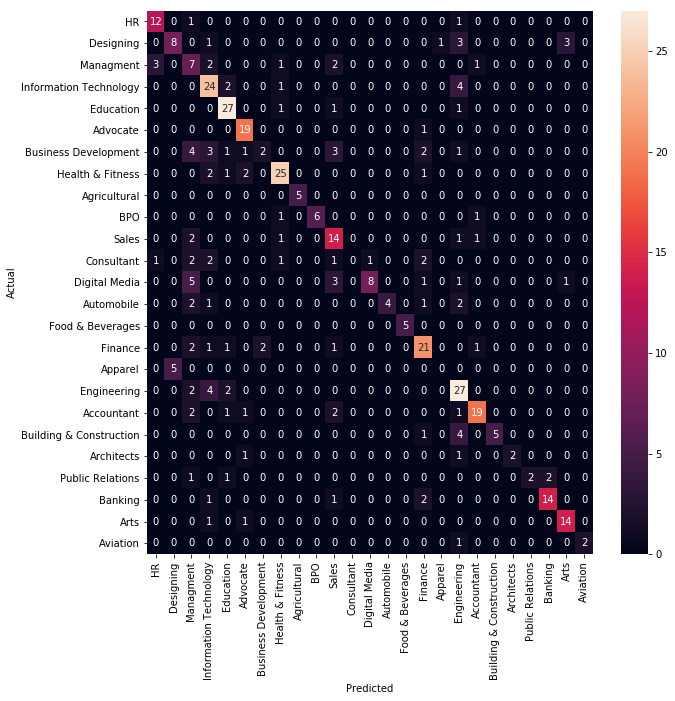

In [12]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be.
Finally, we print out the classification report for each class:

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Category'].unique()))

                         precision    recall  f1-score   support

                     HR       0.75      0.86      0.80        14
              Designing       0.62      0.50      0.55        16
              Managment       0.23      0.44      0.30        16
 Information Technology       0.57      0.77      0.66        31
              Education       0.75      0.90      0.82        30
               Advocate       0.76      0.95      0.84        20
   Business Development       0.50      0.12      0.19        17
       Health & Fitness       0.81      0.81      0.81        31
           Agricultural       1.00      1.00      1.00         5
                    BPO       1.00      0.75      0.86         8
                  Sales       0.50      0.74      0.60        19
             Consultant       0.00      0.00      0.00        10
          Digital Media       0.89      0.42      0.57        19
             Automobile       1.00      0.40      0.57        10
       Food & Beverages 

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
